In [2]:
#!nvidia-smi

### Get dataset

In [1]:
import os
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
main_path = "/content/gdrive/MyDrive/Chicken_Health and_Behavior_Detection"
source_path = f'{main_path}/data/processed/images_datasets/data.zip'
destination_path = '/content'

In [5]:
!cp "$source_path" "$destination_path"

In [7]:
!unzip -q "$destination_path/data.zip" -d "$destination_path/data"

### Load and split data

In [9]:
!cp "$main_path/utils/split_dataset.py" "$destination_path"

In [10]:
!python split_dataset.py --datapath="$destination_path/data" --train_pct=0.9


Total images : 24
Train: 21 || Val: 3



Ultralytics YOLO model

In [ ]:
#!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 130.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 117.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

Train Configuration

In [11]:
!cp "$main_path/utils/create_data_yaml.py" "$destination_path"

In [12]:
!python create_data_yaml.py --classes="$destination_path/data/classes.txt" --output="$destination_path/data.yaml"

Run Model Training

In [ ]:
!yolo detect train data="$destination_path/data.yaml" model=yolo11s.pt epochs=100 imgsz=640

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 18.4M/18.4M [00:00<00:00, 56.1MB/s]
Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False,

In [ ]:
!yolo detect predict model=runs/detect/train/weights/best.pt source=data/validation/images save=True

Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs

image 1/3 /content/data/validation/images/03688_jpg.rf.7b92aac7d36878e572e1ee9a6541eff4.jpg: 384x640 45 0s, 51.9ms
image 2/3 /content/data/validation/images/03720_jpg.rf.a6e186bed554929700c474aa5939befc.jpg: 384x640 43 0s, 10.6ms
image 3/3 /content/data/validation/images/03725_jpg.rf.e28c544d600da0a84ab1648dc81b61aa.jpg: 384x640 47 0s, 11.2ms
Speed: 2.1ms preprocess, 24.6ms inference, 48.5ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


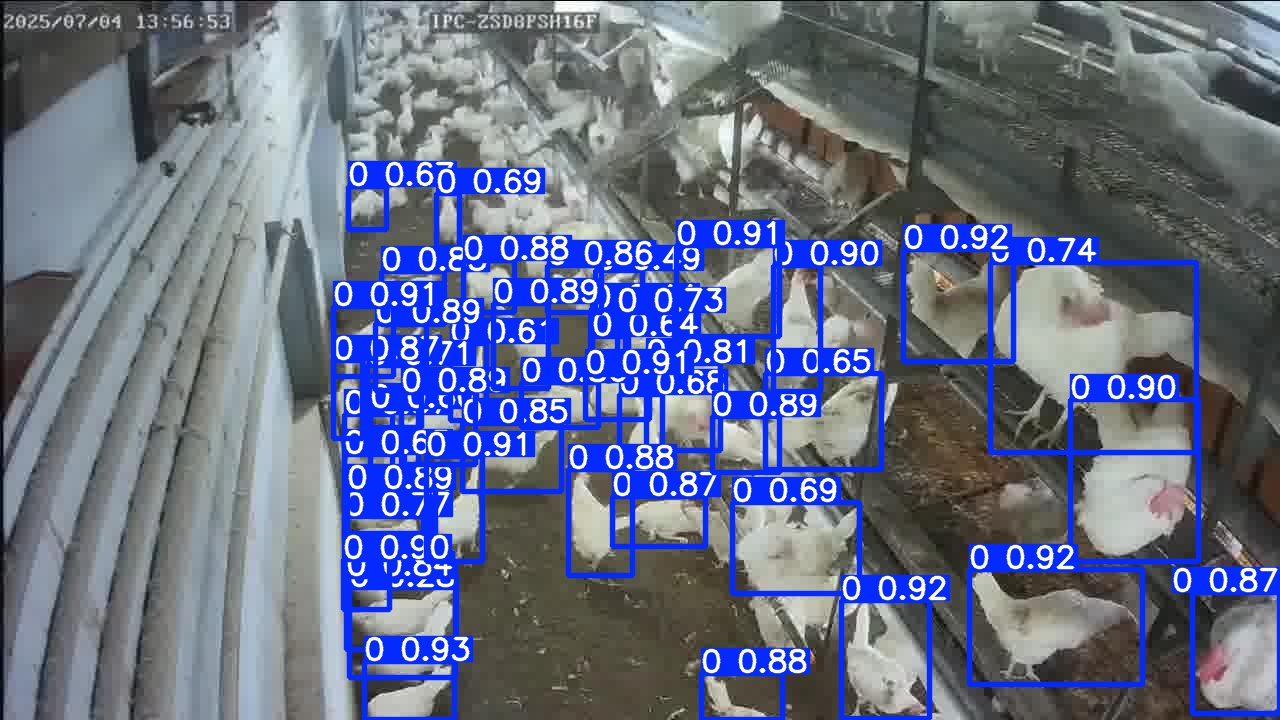

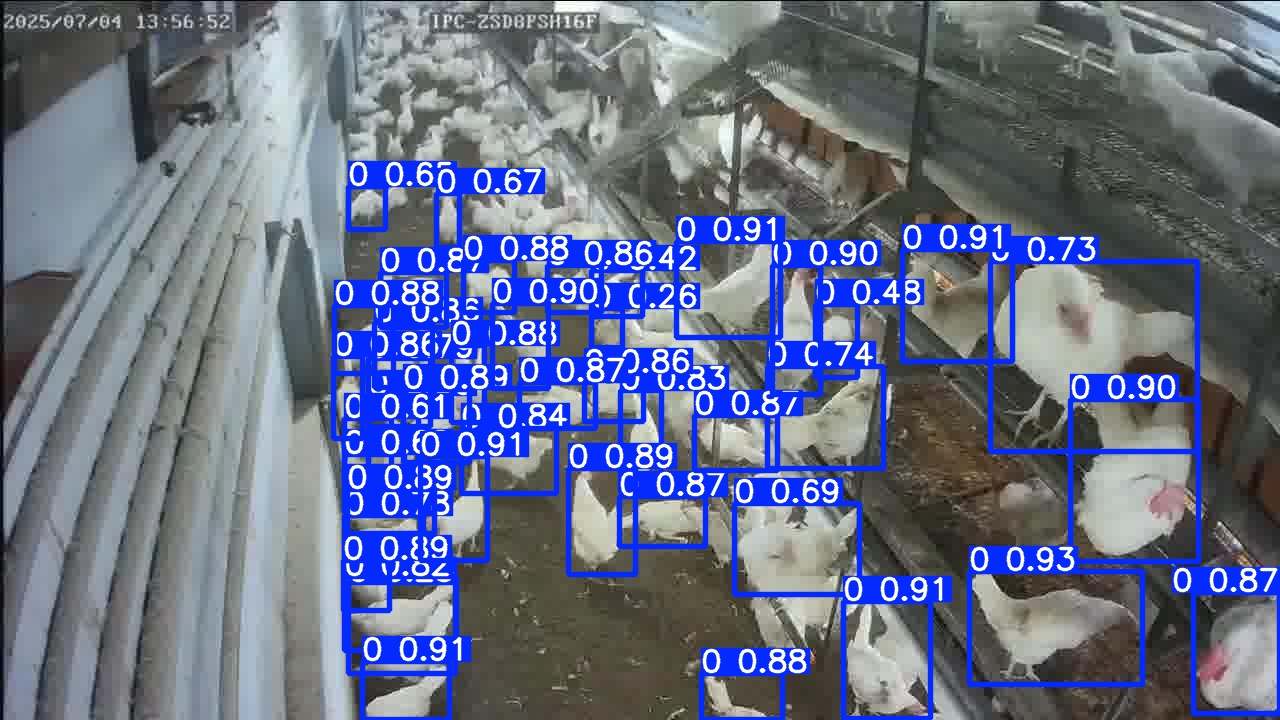

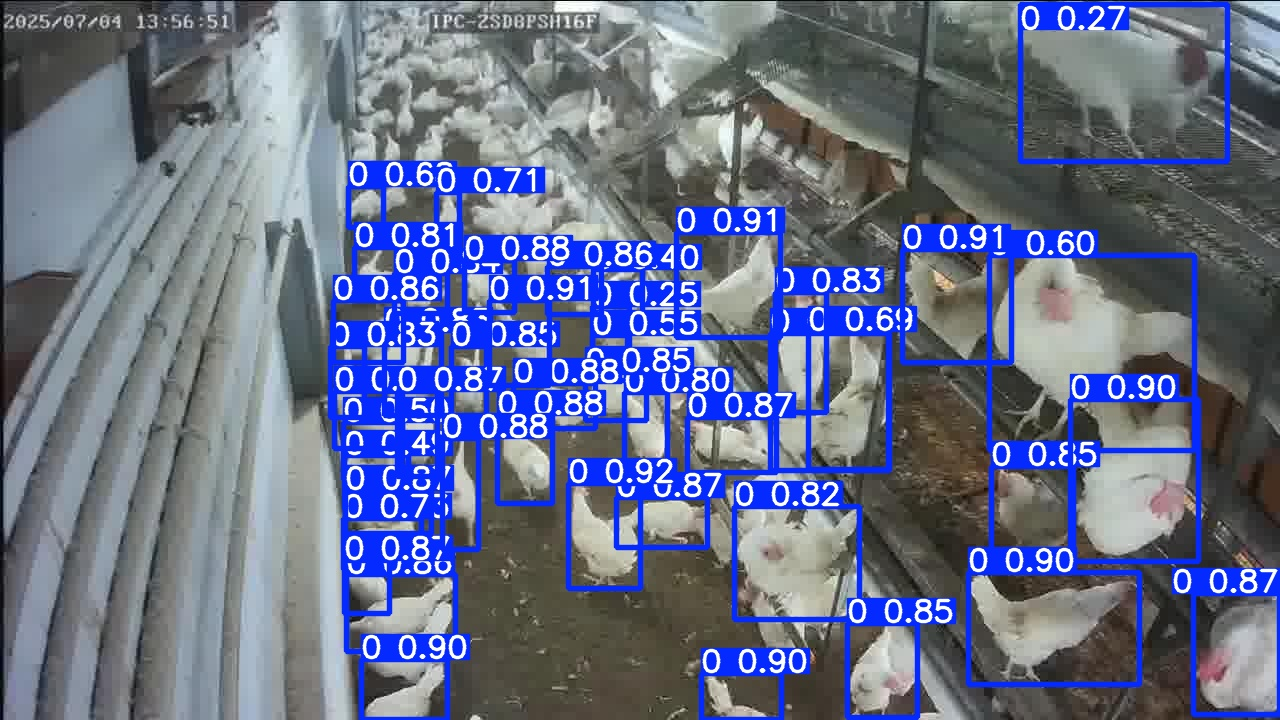

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:10]:
  display(Image(filename=image_path, height=400))
  print('\n')

In [ ]:
!mkdir -p "$destination_path/model_yolov11s" #Create output

#Copy best weights into the output folder
!cp "$destination_path/runs/detect/train/weights/best.pt" "$destination_path/model_yolov11s/yolov11s.pt"

#Copy training results folder
!cp -r "$destination_path/runs/detect/train/weights" "$destination_path/model_yolov11s/train"

#Zip into one file
!zip -r "$destination_path/model_yolov11s.zip" -j "$destination_path/model_yolov11s"

  adding: yolov11s.pt (deflated 8%)
  adding: last.pt (deflated 8%)
  adding: best.pt (deflated 8%)


In [ ]:
from google.colab import files
files.download('/content/model_yolov11s.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Test load model

In [18]:
import time
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [19]:
model = YOLO('model_yolov11s/yolov11s.pt')
source_ces = "$main_path/data/processed/video_test.mp4"

In [ ]:
f_count = 0
start_time = time.time()
results = model(source_ces, stream=True, save=True)

In [ ]:
for r in results:
    boxes = r.boxes
    masks = r.masks
    probs = r.probs

    f_count += 1

end_time = time.time()
total_time = end_time - start_time
fps = f_count / total_time

print(f'Total frames processed : {f_count}')
print(f'Total time taken : {total_time:.1f} seconds')
print(f'Frames per second : {fps:.1f}')


video 1/1 (frame 1/927) /content/gdrive/MyDrive/Chiken_Behavior_Analysis/Data/Video/video_test.mp4: 384x640 46 0s, 11.6ms
video 1/1 (frame 2/927) /content/gdrive/MyDrive/Chiken_Behavior_Analysis/Data/Video/video_test.mp4: 384x640 46 0s, 10.7ms
video 1/1 (frame 3/927) /content/gdrive/MyDrive/Chiken_Behavior_Analysis/Data/Video/video_test.mp4: 384x640 43 0s, 10.7ms
video 1/1 (frame 4/927) /content/gdrive/MyDrive/Chiken_Behavior_Analysis/Data/Video/video_test.mp4: 384x640 43 0s, 10.8ms
video 1/1 (frame 5/927) /content/gdrive/MyDrive/Chiken_Behavior_Analysis/Data/Video/video_test.mp4: 384x640 43 0s, 11.3ms
video 1/1 (frame 6/927) /content/gdrive/MyDrive/Chiken_Behavior_Analysis/Data/Video/video_test.mp4: 384x640 43 0s, 11.0ms
video 1/1 (frame 7/927) /content/gdrive/MyDrive/Chiken_Behavior_Analysis/Data/Video/video_test.mp4: 384x640 43 0s, 10.6ms
video 1/1 (frame 8/927) /content/gdrive/MyDrive/Chiken_Behavior_Analysis/Data/Video/video_test.mp4: 384x640 42 0s, 10.6ms
video 1/1 (frame 9/927)